In [110]:
import numpy as np
import pandas as pd


dfin = pd.read_csv('../NNNormalizeDataIn.csv',header=None)  #inputs 128 lines per sample
dfout = pd.read_csv('../NNNormalizeDataOutClassses.csv',header=None)  #output classes 

dfin=dfin.drop(dfin.columns[0], axis=1)
dfin=dfin.drop(dfin.columns[0], axis=1)
dfin=dfin.drop(dfin.columns[0], axis=1)
dfin=dfin.drop(dfin.columns[0], axis=1)




total_inputs,total_output = dfin.as_matrix().astype(np.float32),dfout.as_matrix().astype(np.int32)



total_inputs = np.reshape(total_inputs, (-1,128,5))




In [111]:
print(dfin)
total_inputs


               4         5         6         7         8
0       0.101389  1.000000  0.198721  0.322413  0.595887
1       0.202092  1.000000  0.198721  0.450774  0.502460
2       0.938606  0.906729  0.198721  0.377375  0.383217
3      -0.576161  0.906729  0.198721  0.307708  0.367167
4      -0.266649  0.906729  0.198721  0.466760  0.299011
5       0.329141  0.906729  0.298681  0.528643  0.292162
6       0.155403  0.811554  0.398641  0.479747  0.143024
7       0.295242  0.716380  0.398641  0.685517  0.093847
8      -0.004525  0.716380  0.398641  0.797166  0.135600
9       0.371859  0.621205  0.498601  1.000000  0.121175
10      0.655945  0.430856  0.498601  0.915631 -0.038039
11      0.169786  0.335681  0.498601  0.627968  0.006766
12      0.097662  0.240506  0.498601  0.529138  0.126478
13      0.035765  0.240506  0.498601  0.364077  0.170202
14      0.064496  0.240506  0.498601  0.402454  0.164789
15     -0.099319  0.240506  0.498601  0.533258  0.287137
16     -0.176964  0.240506  0.4

array([[[ 0.10138864,  1.        ,  0.19872051,  0.32241258,  0.59588689],
        [ 0.2020921 ,  1.        ,  0.19872051,  0.45077366,  0.50246048],
        [ 0.93860567,  0.90672886,  0.19872051,  0.37737539,  0.38321662],
        ..., 
        [ 0.12344307, -0.04501761,  0.09876049,  0.17321697,  0.35674417],
        [ 0.15961033, -0.04501761,  0.09876049,  0.24600889,  0.34299701],
        [ 0.02459435, -0.04501761,  0.09876049,  0.09889201,  0.34476128]],

       [[ 0.33844852,  0.05015704,  1.        ,  0.44855726,  0.54358482],
        [-0.44452608,  0.05015704,  1.        ,  0.43982789,  0.50699884],
        [ 0.22631319,  0.05015704,  1.        ,  0.44301313,  0.35600194],
        ..., 
        [ 0.11751637, -0.04501761,  0.09876049,  0.59203231,  0.18309511],
        [ 0.11751637, -0.04501761,  0.09876049,  0.58398175,  0.20286684],
        [ 0.11751637, -0.04501761,  0.09876049,  0.55673671,  0.15492986]],

       [[ 0.3779037 , -0.2353669 ,  0.19872051,  0.24365932,  0.0281

In [99]:
total_output

array([[4],
       [0],
       [2],
       ..., 
       [1],
       [2],
       [1]], dtype=int32)

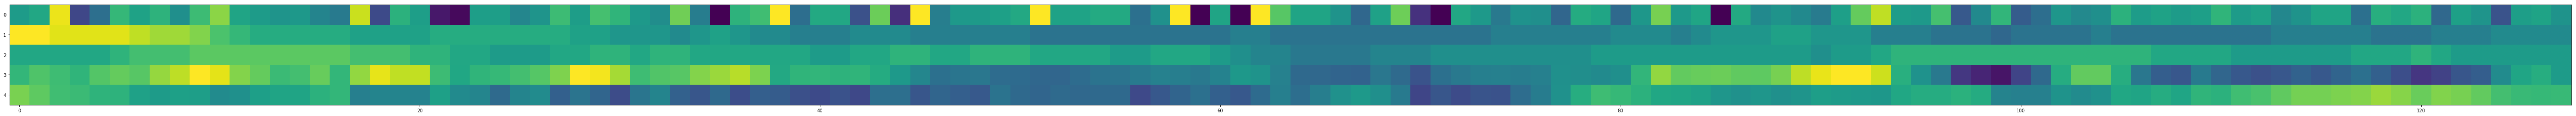

In [112]:
import matplotlib.pyplot as plt
n=1
plt.figure(figsize=(100,30))
for i in range(n):
    # display original
    ax = plt.subplot(5, 1, i+1)
    plt.imshow(total_inputs[i].T)
    #plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()


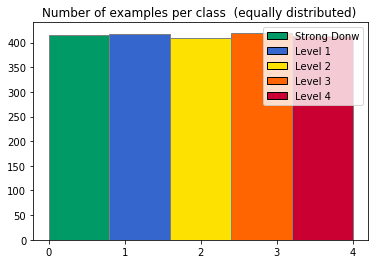

In [23]:
counts, bins, patches= plt.hist(total_output, bins=5, edgecolor='gray') 
plt.title("Number of examples per class  (equally distributed) ")
patches[0].set_facecolor('#FFFFFF')
patches[1].set_facecolor('#CCCCCC')
patches[2].set_facecolor('#888888')
patches[3].set_facecolor('#444444')
patches[4].set_facecolor('#000000')




#create legend
from matplotlib.patches import Rectangle
l0 = '#FFFFFF'
l1 = '#CCCCCC'
l2 = '#888888'
l3 = '#444444'
l4 = '#000000'

#Alarm Color
l0 = '#009a66'
l1 = '#3566cd'
l2 = '#fde101'
l3 = '#ff6500'
l4 = '#cb0032'

patches[0].set_facecolor(l0)
patches[1].set_facecolor(l1)
patches[2].set_facecolor(l2)
patches[3].set_facecolor(l3)
patches[4].set_facecolor(l4)

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [l0,l1,l2,l3,l4]]
labels= ["Strong Donw","Level 1", "Level 2","Level 3","Level 4"]
plt.legend(handles, labels)

y = [0,1,2,3,4]
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))
#plt.xticks(ticker.FormatStrFormatter('%0.1f'))
plt.xticks(y)
plt.savefig('histo-target-co2-classes-number.svg')
plt.show()

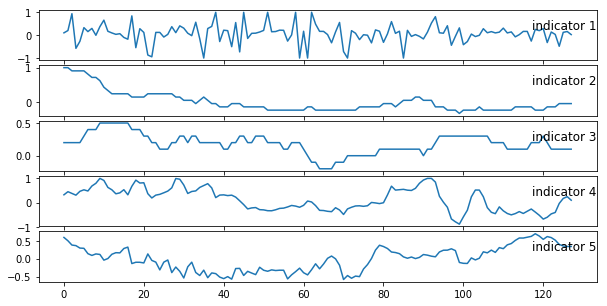

In [113]:
from matplotlib import pyplot
groups = [0, 1, 2, 3, 4]#,5,6,7,8]
values=total_inputs[0]
i=1
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 0.1)
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:,group])
	pyplot.title("indicator "+str(i), y=0.5, loc='right')
	i += 1
    
pyplot.savefig('inputaschart.pdf')

pyplot.show()

In [115]:
import tensorflow as tf
from keras import backend as K
from keras.optimizers import Adam
from keras.utils import np_utils

NB_EPOCH = 200
# network and training
BATCH_SIZE = 64
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 128, 5 # input image dimensions
NB_CLASSES = 5  # number of outputs = number of classes
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

y_train = np_utils.to_categorical(total_output, NB_CLASSES)



In [116]:
y_train

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [117]:
total_output

array([[4],
       [0],
       [2],
       ..., 
       [1],
       [2],
       [1]], dtype=int32)

In [118]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau


sess = tf.Session()
K.set_session(sess)

#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		#model.add(InputLayer())
		# CONV => RELU => POOL
		# kernel size (width, height) default (2,5)
		model.add(Conv2D(20, kernel_size=(8,5), padding="same",
			input_shape=input_shape))
                         #,batch_input_shape=(64,1, 5, 7)))
		model.add(Activation("relu"))
		# pool size - down scale int factor (vertical, horizontal)
		model.add(MaxPooling2D(pool_size=(4, 1), strides=(2, 1)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=(8,5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(4, 1), strides=(2, 1))) #1,2
		model.summary()
		model.add(Dropout(0.40))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(400))
		model.add(Activation("relu"))
		model.add(Dropout(0.5))
		model.add(Dense(150))
		model.add(Activation("relu"))
		model.add(Dropout(0.8))
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		#model.add(Dropout(0.3)) # not logical to do droput on last layer with softmax 
		return model

    
K.set_image_dim_ordering("th")


In [119]:
X_train = total_inputs[:, np.newaxis, :, :]

In [120]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 20, 128, 5)        820       
_________________________________________________________________
activation_21 (Activation)   (None, 20, 128, 5)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 63, 5)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 63, 5)         40050     
_________________________________________________________________
activation_22 (Activation)   (None, 50, 63, 5)         0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 30, 5)         0         
Total params: 40,870
Trainable params: 40,870
Non-trainable params: 0
_________________________________________________________________
______

In [121]:
sess.run(tf.global_variables_initializer())


tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
esCallBack = EarlyStopping(monitor='val_acc', min_delta=0, patience=12, verbose=0, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
		verbose=1, # 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.
		validation_split=VALIDATION_SPLIT, callbacks=[tbCallBack])#,reduce_lr,esCallBack])



Train on 1660 samples, validate on 415 samples
Epoch 1/200
1660/1660 [==============================] - 25s - loss: 1.6219 - acc: 0.1970 - val_loss: 1.6090 - val_acc: 0.2217

KeyboardInterrupt: 